# Crop Yield Prediction

The aim of this notebook is to predict the crop yield using the data from the given dataset. The dataset has been taken from the [Crop Yield Prediction](https://www.kaggle.com/datasets/yaminh/crop-yield-prediction).

<img src = "https://storage.googleapis.com/kaggle-datasets-images/4469754/7664692/d9ece1ab766cdd4f7c64f2f6352cb9c2/dataset-cover.jpg?t=2024-02-20-15-34-04" width = "700" height = "500">

### Data Dictionary
| Column Name | Description |
|-------------|-------------|
| Rain Fall (mm) | Rainfall in millimeters |
| Temperature (C) | Temperature in Celsius |
| Fertilizer (kg) | Fertilizer in kilograms |
| Nitrogen (N)| Nitrogen macro nutrient |
| Phosphorous (P) | Phosphorous macro nutrient |
| Potassium (K) | Potassium macro nutrient |
| Yield (Q/acres) | Crop yield Quintals per acre|

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/crop yield data sheet.xlsx")
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


## Data Preprocessing

In [ ]:
#Checking the shape of the dataset
df.shape

(109, 7)

In [ ]:
#Checking the data types of the columns
df.dtypes

,0
Rain Fall (mm),float64
Fertilizer,float64
Temperatue,object
Nitrogen (N),float64
Phosphorus (P),float64
Potassium (K),float64
Yeild (Q/acre),float64


Here, the temperature has object data type. We need to convert it to float data type. But first, I am checking the values in the column

In [ ]:
df['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40, nan, ':'],
      dtype=object)

The column has invalid value ":" .I need to remove this value before converting the column to float data type.

In [ ]:
#Dropping ":" from the Temperatue column
df = df[df['Temperatue'] != ':']

In [ ]:
#converting the Temperatue column to float
df['Temperatue'] = df['Temperatue'].astype(float)

In [ ]:
#Checking for null values
df.isnull().sum()

,0
Rain Fall (mm),9
Fertilizer,9
Temperatue,9
Nitrogen (N),9
Phosphorus (P),9
Potassium (K),9
Yeild (Q/acre),9


Replacing missing values with median of the column

In [ ]:
#replacing missing values with median
columns = [df.columns]
for col in columns:
    df[col] = df[col].fillna(df[col].median())

Descriptive Statistics

In [ ]:
df.describe()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,874.814815,67.990741,32.111111,70.759259,21.120370,18.138889,9.046296
std,391.818744,9.616473,5.277944,6.390516,1.868167,1.758601,1.881460
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,20.000000,16.000000,7.000000
50%,1150.000000,70.000000,29.000000,71.000000,21.000000,19.000000,9.000000
75%,1226.250000,77.000000,38.000000,76.250000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


In [ ]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0


## Exploratory Data Analysis

### Rainfall Distribution

<Axes: xlabel='Rain Fall (mm)', ylabel='Count'>

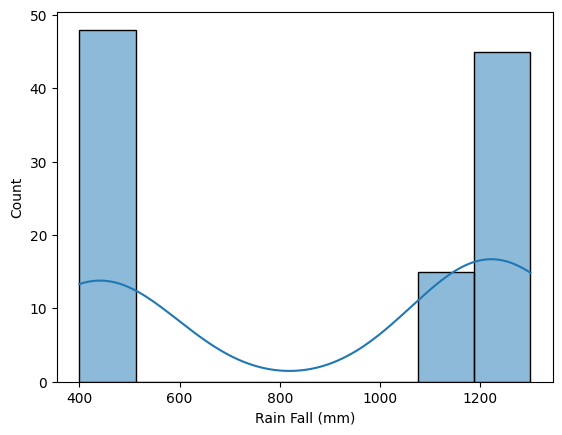

In [ ]:
sns.histplot(x = "Rain Fall (mm)", data = df, kde = True)

In the above histogram we can see the distribution of the rainfall in mm. The graph reveals that that the rainfall is not normally distributed. Either the rainfall is is between 400 - 500 mm or it is above 1100 mm. This could indicate that the dataset has been collected for different crops which require different amount of rainfall.

### Fertilizer Distribution

<Axes: xlabel='Fertilizer', ylabel='Count'>

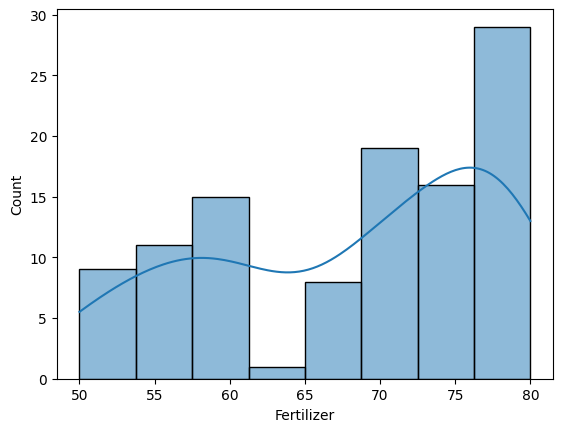

In [ ]:
sns.histplot(x = "Fertilizer", data = df, kde = True)

This graph shows the distribution of fertilizer used for the crop. In the graph we can seen there are two divisions in the usage of fertilizer. One is less than 65 and the other is above 65. Fertilizer has huge impact on the crop yield. Therefore, we can assume that there could be a proportional relationship between the fertilizer and the crop yield. We can confirm this assuumption in the latter section of the EDA.

### Temperature Distribution

<Axes: xlabel='Temperatue', ylabel='Count'>

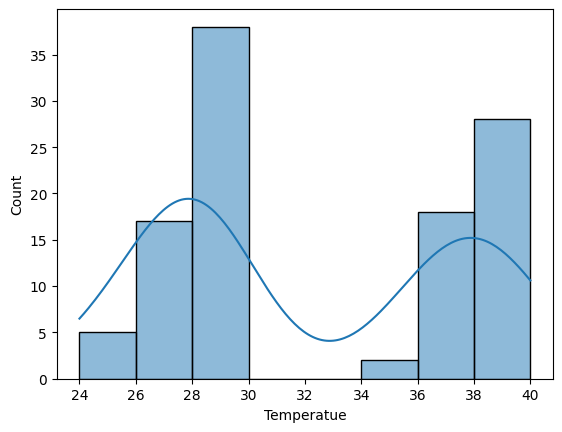

In [ ]:
sns.histplot(x="Temperatue", data = df, kde = True)

The temperature graph also shows two similar peaks just like the pervious two graphs, which hints that the dataset could be collected for two different crops. The temperature is not normally distributed. The temperature is either between 25 - 30 or 35 - 40. This may indicate that their could be a rabi and kharif crop in the dataset.

### Macronutrients (NPK) Distribution

<Axes: xlabel='Potassium (K)', ylabel='Count'>

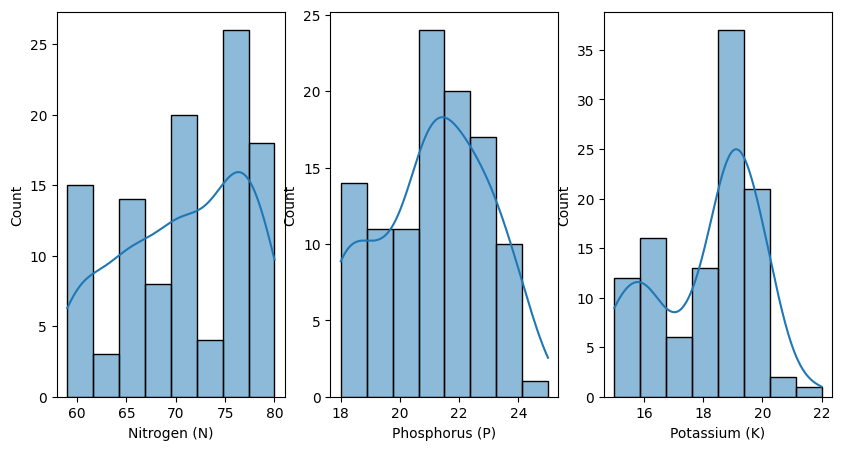

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(10, 5))
sns.histplot(x = "Nitrogen (N)", data = df, kde = True, ax = ax[0])
sns.histplot(x = "Phosphorus (P)", data = df, kde = True, ax = ax[1])
sns.histplot(x = "Potassium (K)", data = df, kde = True, ax = ax[2])

These three graphs shows that the distribution of the macronutrients used in the crop. From the graph for Nitrogen, we can see that larger quantity of nitrogen is used in the crop. The graph for Phosphorous shows that the usage of phosphorous is less than nitrogen. The graph for Potassium shows that the usage of potassium is very less compared to nitrogen and phosphorous but still it has two peaks. This could indicate that the dataset has been collected for two different crops with different potassium requirements but similar nitrogen and phosphorous requirements.

### Yield Distribution

<Axes: xlabel='Yeild (Q/acre)', ylabel='Count'>

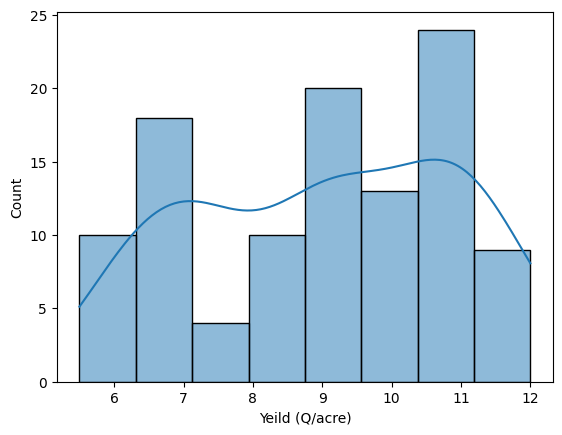

In [ ]:
sns.histplot(x = "Yeild (Q/acre)", data = df, kde = True)

The graph shows the distribution of the crop yield. The graph has two smaller peaks which could indicate the difference in the yield of two different crops on the same kind of soil.

Now, after reviewing the distribution of data across all the columns, I have made some hypothesis such as presence of two different crops in the dataset, and the relationship between the crop yield and the other columns. Now, I will test these hypothesis in the next section.

### RainFall and Crop Yield

<Axes: xlabel='Rain Fall (mm)', ylabel='Yeild (Q/acre)'>

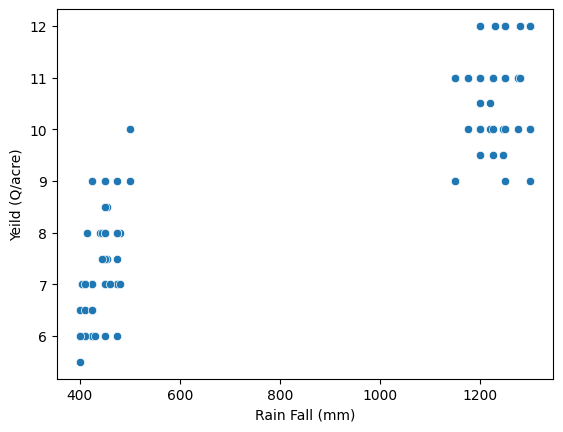

In [ ]:
sns.scatterplot(x = 'Rain Fall (mm)', y = 'Yeild (Q/acre)', data = df)

In this graph we can clearly see two clusters of data. The first cluster is between 400 - 500 mm and the second cluster is above 1100 mm. This shows that one crop has lower rainfall requirement and the other has higher rainfall requirement. However, still there is difference in the yield of the crops, which could be due to the other factors such as temperature, fertilizer, and macronutrients and most importantly the type of soil.

### Ferilizer and Crop Yield

<Axes: xlabel='Fertilizer', ylabel='Yeild (Q/acre)'>

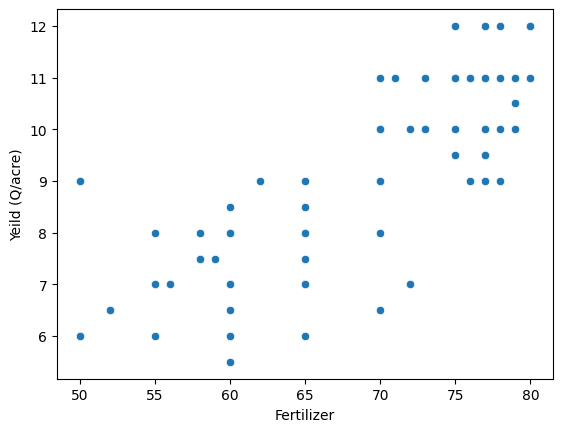

In [ ]:
sns.scatterplot(x = 'Fertilizer', y = 'Yeild (Q/acre)', data = df)

This graph shows that the crop yield is not directly proportional to the amount of fertilizer used. There are many data points where the crop yield is high even when the fertilizer used is less than 65. This could indicate that the type of soil and the macronutrients in the soil could be the reason for the high yield.

### Temperature and Crop Yield

<Axes: xlabel='Temperatue', ylabel='Yeild (Q/acre)'>

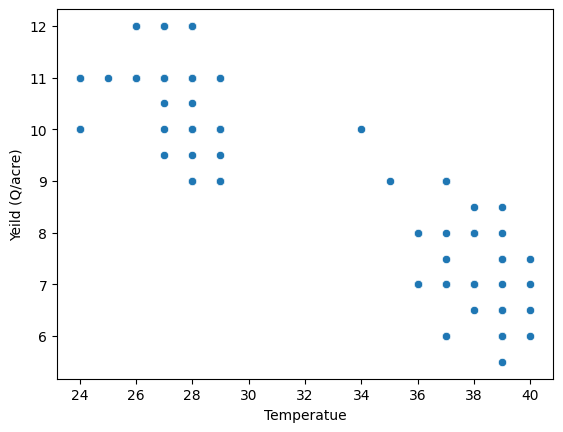

In [ ]:
sns.scatterplot(x = 'Temperatue', y = 'Yeild (Q/acre)', data = df)

The graph of temperature and crop yield also shows two clusters. The first cluster is between 25 - 30 and the second cluster is between 35 - 40. This could indicate that the dataset has been collected for two different crops. In the first cluster, the crop yield is higher than the second cluster. This could indicate that the first cluster could be the rabi crop and the second cluster could be the kharif crop.

### Macronutrients and Crop Yield

<Axes: xlabel='Potassium (K)', ylabel='Yeild (Q/acre)'>

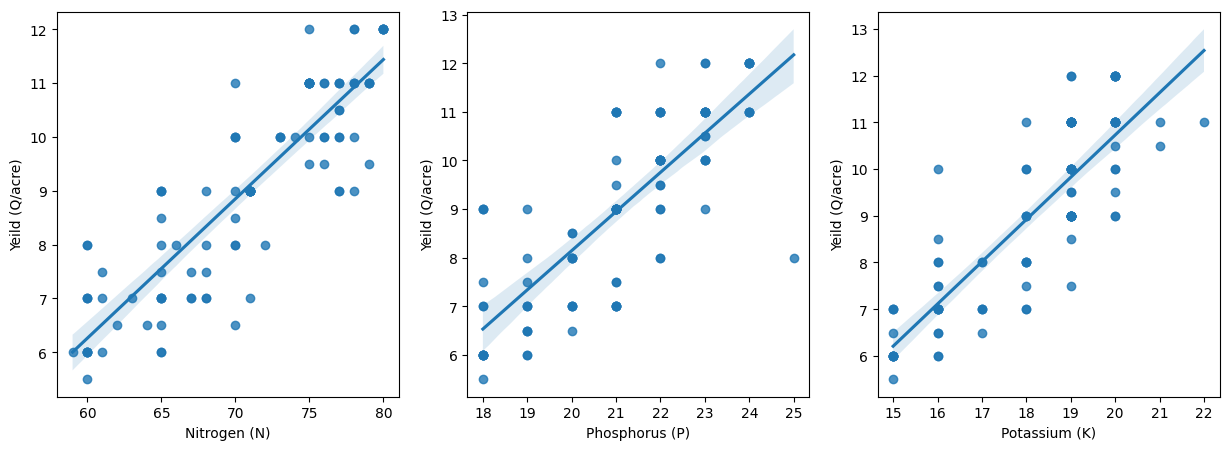

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
sns.regplot(x = 'Nitrogen (N)', y = 'Yeild (Q/acre)', data = df, ax = ax[0])
sns.regplot(x = 'Phosphorus (P)', y = 'Yeild (Q/acre)', data = df, ax = ax[1])
sns.regplot(x = 'Potassium (K)', y = 'Yeild (Q/acre)', data = df, ax = ax[2])

Here in the graphs between the nutrients and the crop yield, we can see a hint of proportional relationship between the nutrients and the crop yield. The crop yield is higher when the nutrients are higher. This could indicate that the soil has less nutrients and the crop yield is less. However, still there are many data points which deviate from the proportional relationship. This could be due to other miscellaneous factors such as crop breed, soil type, and weather conditions.

### Correlation Matrix Heatmap

<Axes: >

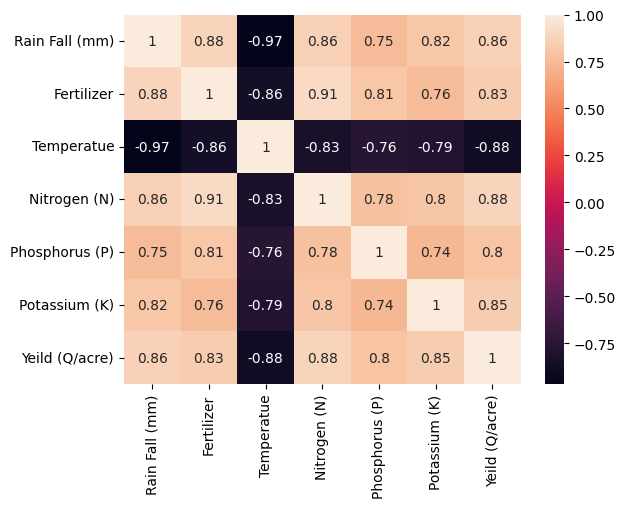

In [ ]:
sns.heatmap(df.corr(), annot = True)

From the above EDA, we can see that the dataset has been collected for two different crops. The dataset has two clusters for rainfall, temperature, and crop yield. There are signs of proportional relationship between the nutrients and the crop yield. However, the relationship between the crop yield and the other columns is not directly proportional. This could be due to the other factors such as soil type, weather conditions, and crop breed. On the whole, the dataset is not much complex to make concrete decisions based on the graphs only.

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Yeild (Q/acre)', axis = 1), df['Yeild (Q/acre)'], test_size = 0.2, random_state = 42)

## Model Building

I will be using the following models to predict the crop yield:

1. Decision Tree Regressor
2. Random Forest Regressor

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#Decision Tree Regressor object
dtr = DecisionTreeRegressor()

#### Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(dtr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


In [ ]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 8, random_state = 0)

#fitting the model
dtr.fit(X_train, y_train)

#training score
print(dtr.score(X_train, y_train))

#prediction
d_pred = dtr.predict(X_test)

0.9279431916668135


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor object
rfr = RandomForestRegressor()

#### Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "n_estimators": [100,200,300],
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(rfr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 42}


In [ ]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 6, n_estimators = 100, random_state = 42)

#fitting the model
rfr.fit(X_train, y_train)

#training score
print(rfr.score(X_train, y_train))

#prediction
r_pred = rfr.predict(X_test)

0.9355014219068669


## Model Evaluation

### Distribution Plot

<ipython-input-29-84cbca67ae08>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax = ax[0]).set_title('Decision Tree Regressor')
<ipython-input-29-84cbca67ae08>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_pred, ax = ax[0])
<ipython-input-29-84cbca67ae08>:8: UserWarning: 

`distpl

<Axes: title={'center': 'Random Forest Regressor'}, xlabel='Yeild (Q/acre)', ylabel='Density'>

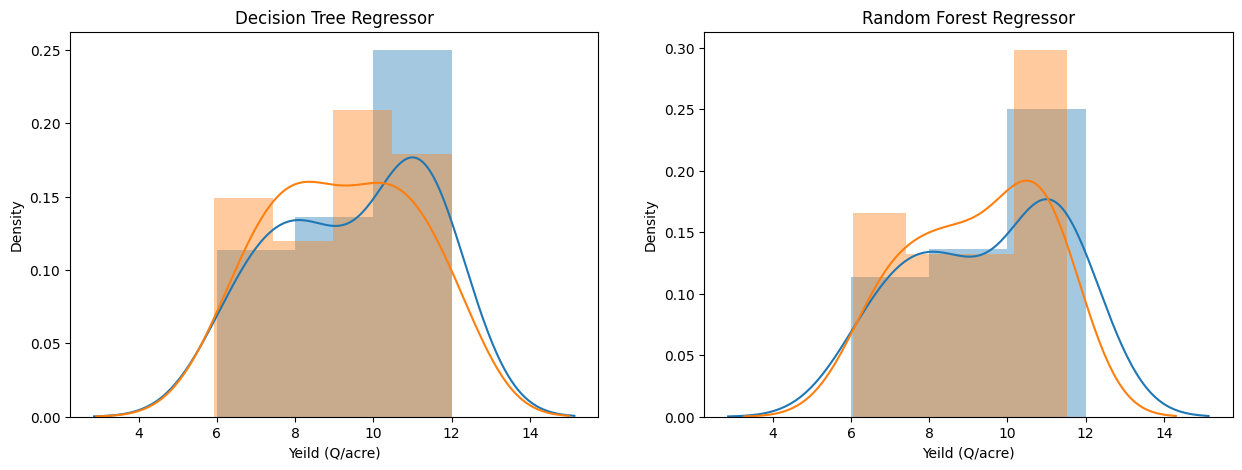

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))

#plotting the actual vs predicted values for decision tree regressor
sns.distplot(y_test, ax = ax[0]).set_title('Decision Tree Regressor')
sns.distplot(d_pred, ax = ax[0])

#plotting the actual vs predicted values for random forest regressor
sns.distplot(y_test, ax = ax[1]).set_title('Random Forest Regressor')
sns.distplot(r_pred, ax = ax[1])


### Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Decision Tree Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("R2 Score: ", r2_score(y_test, d_pred))
print("\n")
print("Random Forest Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print("R2 Score: ", r2_score(y_test, r_pred))

Decision Tree Regressor
Mean Squared Error:  0.8250555099243105
Mean Absolute Error:  0.6832293523469994
R2 Score:  0.7709296619513172


Random Forest Regressor
Mean Squared Error:  0.7108302219107439
Mean Absolute Error:  0.6836246853366845
R2 Score:  0.8026434375994264


## Feature Importance

Text(0.5, 1.0, 'Random Forest Regressor')

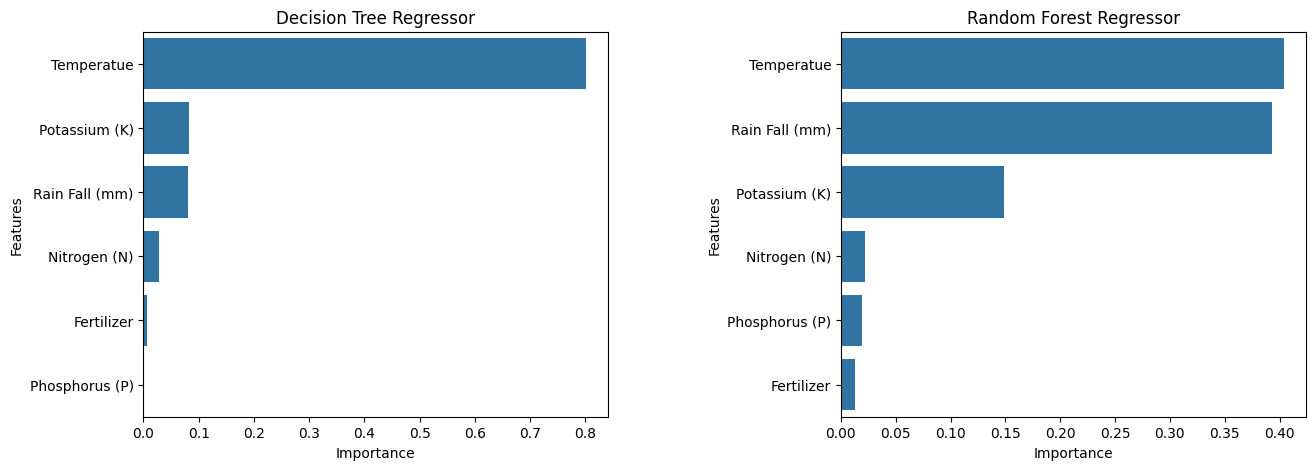

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')

## Conclusion

From the above analysis in the Exploratory Data Analysis, it is clear that there are two crops in the dataset, whose presence has been confirmed with presence of two definite clusters in the graphs of rainfall, temperature, and crop yield. The dataset has been collected for two different crops. The dataset has signs of proportional relationship between the nutrients and the crop yield. However, the relationship between the crop yield and the other columns is not directly proportional. This could be due to the other factors such as soil type, weather conditions, and crop breed. On the whole, the dataset is not much complex to make concrete decisions based on the graphs only.

Coming to the machine learning models, I have used Decision Tree Regressor and Random Forest Regressor to predict the crop yield. The Random Forest Regressor has performed better than the Decision Tree Regressor. The Random Forest Regressor has a R2 score of 0.802 and the Decision Tree Regressor has r2 score of 0.77. From the feature importance graph, we can see that the temperature has the highest importance in predicting the crop yield. The temperature is followed by the rainfall, however the macro nutrients tend to have comparatively less importance in predicting the crop yield.